# 3) ML Project - Air Pollution - Data Exploration - Merging Additional Databases

<font color='blue'> Scripts by Kevin Jeswani, Junaid Zafar, & Laiba Shah 
<br>
WeCloudData Bootcamp 2022 (Part-time Cohort)<br> </font>

First we take a look at a dataset for air pollutions deaths due over time for different countries. We visualize data and develop the linear regression models on the regional and national level. The linear regression models are valuable at predicting the general trend in deaths due over time and be used to predict future deaths, where past data appears to be highly linear. It has severe limitations for many countries. Polynomial models could be explored. To explore the interaction with other features, we proceed to merge different datasets between death due to environmental factors and socio-demographic/economic factors. We then examine them in 3 tree-based machine learning models.

The set of scripts in the folder 'AirPollution_Scripts' are segmented for the purpose of clarity & convenience <br>
The following is the suggested order for running the scripts:
- 'MLProject_AirPollution_Viz_LR.ipynb' - loading the initial Kaggle air pollution deaths dataset, processing, visualizing the base dataset, linear regression examination and future predictions.
- 'MLProject_DataProcessing_OECD_WB_GBD.ipynb'  - loading raw data from world bank and GBD/OECD datasets, cleaning, and merging usable data. We test the use of fuzzy data set merging.
- 'MLProject_Exploratory_ML_Models.ipynb' **This Script**- loading the cleaning & merged dataset, testing out KNN regressor, and model selection with PyCaret, and discussion of models/insights in modelling data.
- 'MLProject_ML_Models_refined.ipynb' - development of selected machine learning models (Extra Trees, Random Forest, XGBoost), cross-validation, & Ensemble methods; discussion of model results

The aim is to explore the intial dataset (https://www.kaggle.com/datasets/akshat0giri/death-due-to-air-pollution-19902017?resource=download), supplement it, infer trends, and make predictions on future deaths due to environmental factors. 
The data is then supplement with:
- Global Burden of Disease Study 2019 Results via OECD.stats: https://stats.oecd.org/index.aspx?lang=en# (where the Kaggle dataset seems to have extracted and cleaned data from)
- World Bank Development Indicators: https://databank.worldbank.org/source/world-development-indicators#
<br>

**NOTE** Steps in 2.0 are repeated in the 4th script for completeness

## 1.0 Pre-processing

### 1.1 Standard Imports

In [1]:
#Data Processing
import numpy as np 
import numexpr

import pandas as pd
import csv

#Plotting
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Machine Learning - KNN
from sklearn.model_selection import train_test_split #Training & Testing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #Interpreting model score
from sklearn.preprocessing import StandardScaler # for data scaling
from sklearn.neighbors import KNeighborsRegressor #KNN

## 2.0 Data Examination & Processing

**NOTE** Steps in 2.0 are repeated in the 4th script for completeness

In [2]:
root = r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts'
root_raw=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Raw Data'
root_proc=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Processed'

### 2.1 Load Data into DF & Examine Contents

In [3]:
fid = '\MergedData_EnvDeaths_GDP_Pop_Income_SoDI.csv'
df_in = pd.read_csv(root_proc+fid)
df_in

,Unnamed: 0,COU,Country,Year,Deaths_OZone,Deaths_PM2.5,Deaths_Indoor,Deaths_Handwashing,Deaths_Sanitation,Deaths_Water,Deaths_HighTemp,Deaths_LowTemp,GDP_pCapita,Population,Income_Class,SoDI
0,0,AFG,Afghanistan,1990,387.0,2782.0,34372.0,4825.0,2798.0,3702.0,1085.0,7076.0,..,12412311,L,0.187
1,1,AFG,Afghanistan,1991,376.0,2846.0,35392.0,5127.0,3254.0,4309.0,925.0,7610.0,..,13299016,L,0.191
2,2,AFG,Afghanistan,1992,364.0,3031.0,38065.0,5889.0,4042.0,5356.0,908.0,8255.0,..,14485543,L,0.195
3,3,AFG,Afghanistan,1993,367.0,3256.0,41154.0,7007.0,5392.0,7152.0,1159.0,8430.0,..,15816601,L,0.196
4,4,AFG,Afghanistan,1994,387.0,3401.0,43153.0,7421.0,5418.0,7192.0,1398.0,8659.0,..,17075728,L,0.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,6055,ZWE,Zimbabwe,2015,50.0,2785.0,10435.0,4328.0,2879.0,4336.0,389.0,742.0,1445.069702,13814642,L,0.452
6056,6056,ZWE,Zimbabwe,2016,58.0,2723.0,10365.0,4295.0,2798.0,4244.0,464.0,762.0,1464.588957,14030338,L,0.459
6057,6057,ZWE,Zimbabwe,2017,70.0,2630.0,10257.0,4251.0,2744.0,4193.0,180.0,891.0,1235.189032,14236599,L,0.465
6058,6058,ZWE,Zimbabwe,2018,69.0,2600.0,10113.0,4153.0,2608.0,4013.0,282.0,767.0,1254.642265,14438812,LM,0.471


In [4]:
df_in=df_in.drop(['Unnamed: 0'],axis=1)

#### 2.1.1 Quick Analysis dropping entries/rows with missing values 

In [5]:
#drop all entries with missing values - can be refined later
df1=df_in.dropna()

In [6]:
df1.drop(df1[df1['Population']=='..'].index,inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_24420\1282036442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1['Population']=='..'].index,inplace=True)


In [7]:
df1.drop(df1[df1['GDP_pCapita']=='..'].index,inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_24420\305672289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1['GDP_pCapita']=='..'].index,inplace=True)


In [8]:
#Convert to floats as imported incorrectly
df1 = df1.astype({'Population':'float'})
df1 = df1.astype({'GDP_pCapita':'float'})

In [9]:
#Normalize deaths by population (per 100,000)
df1['Deaths_OZone']=100000*df1['Deaths_OZone']/df1['Population']
df1['Deaths_PM2.5']=100000*df1['Deaths_PM2.5']/df1['Population']
df1['Deaths_Indoor']=100000*df1['Deaths_Indoor']/df1['Population']
df1['Deaths_Handwashing']=100000*df1['Deaths_Handwashing']/df1['Population']
df1['Deaths_Sanitation']=100000*df1['Deaths_Sanitation']/df1['Population']
df1['Deaths_Water']=100000*df1['Deaths_Water']/df1['Population']
df1['Deaths_HighTemp']=100000*df1['Deaths_HighTemp']/df1['Population']

Obviously we see that Population is highly correlated to all the environmental factor death metrics, we need to normalize them in deaths per population of 100,000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Year'),
  Text(1.5, 0, 'Deaths_OZone'),
  Text(2.5, 0, 'Deaths_PM2.5'),
  Text(3.5, 0, 'Deaths_Indoor'),
  Text(4.5, 0, 'Deaths_Handwashing'),
  Text(5.5, 0, 'Deaths_Sanitation'),
  Text(6.5, 0, 'Deaths_Water'),
  Text(7.5, 0, 'Deaths_HighTemp'),
  Text(8.5, 0, 'Deaths_LowTemp'),
  Text(9.5, 0, 'GDP_pCapita'),
  Text(10.5, 0, 'Population'),
  Text(11.5, 0, 'SoDI')])

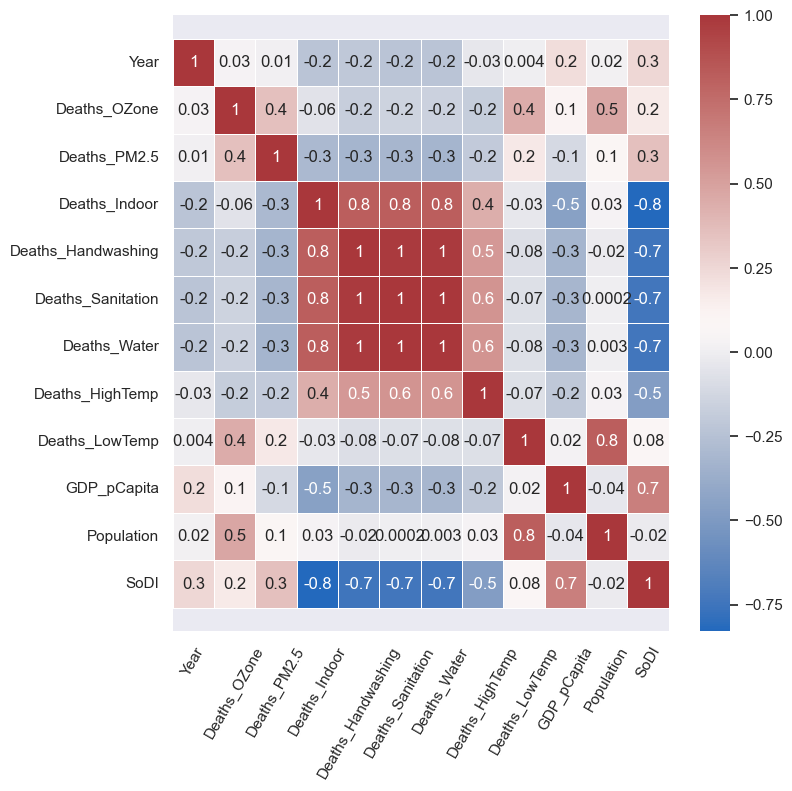

In [10]:
#Examine correlation
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(df1.corr(), fmt='.1g', annot = True, ax=ax,linewidths=.5,cmap="vlag")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=60) 
#plt.savefig('heat_map.png', format='png', dpi=600,bbox_inches='tight')

In [11]:
df1.describe()

,Year,Deaths_OZone,Deaths_PM2.5,Deaths_Indoor,Deaths_Handwashing,Deaths_Sanitation,Deaths_Water,Deaths_HighTemp,Deaths_LowTemp,GDP_pCapita,Population,SoDI
count,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5.712000e+03,5712.000000
mean,2004.842787,1.314585,35.660965,45.802912,16.299296,20.197859,27.737189,3.249897,7468.278361,10463.504255,3.371433e+07,0.566551
std,8.561956,1.737284,27.733254,55.801081,28.414460,37.428147,49.808361,4.655020,37513.970083,16346.645636,1.285389e+08,0.192051
min,1990.000000,0.000000,4.252653,0.000000,0.000000,0.000000,0.000000,-0.401890,-22.000000,22.795345,8.910000e+03,0.050800
25%,1998.000000,0.301701,16.209726,1.180528,0.550901,0.080562,0.236367,0.208564,44.750000,990.776456,1.521587e+06,0.423000
50%,2005.000000,0.762014,27.731755,20.003509,2.589573,1.603355,3.400091,1.405679,675.000000,3328.839243,6.713434e+06,0.584000
75%,2012.000000,1.697602,44.823220,77.529560,20.224593,23.805372,33.702539,4.290566,3668.000000,12176.145617,2.204167e+07,0.724000
max,2019.000000,21.063512,177.953809,283.881378,215.433898,301.746993,393.255319,38.409826,580804.000000,123678.702100,1.407745e+09,0.929000


**NOTE** Steps in 2.0 are repeated in the 4th script for completeness

## 3.0 Testing KNN Regression

In [12]:
#Independent Variables
features=['Year','GDP_pCapita','Population','SoDI'] #'Country' & 'Income_Class' would need to be encoded
X=df1.loc[:,features]

In [13]:
#Dependent variable - classify the level of indoor pollution deaths
y=df1.loc[:,['Deaths_Indoor']]

In [14]:
#y='Deaths_OZone','Deaths_PM2.5','Deaths_Indoor'

In [15]:
SEED = 42
#Split the train and test data - assume 70-30 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)
# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaled_df = pd.DataFrame(X_train, columns=features)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3998.0,1.774163e-15,1.000125,-1.735252,-0.803601,0.011593,0.826788,1.641982
GDP_pCapita,3998.0,8.191991e-17,1.000125,-0.641080,-0.583010,-0.443196,0.122622,6.889054
Population,3998.0,2.099371e-17,1.000125,-0.259733,-0.248833,-0.209174,-0.093579,10.468321
SoDI,3998.0,-8.197545e-17,1.000125,-2.659545,-0.756217,0.089678,0.823217,1.877034


In [16]:
KNN_regressor = KNeighborsRegressor(n_neighbors=5)
KNN_regressor.fit(X_train, y_train)
KNN_score=KNN_regressor.score(X_test, y_test)
print ("KNN Classifer Score with Default Setting: \n {}".format(KNN_score))

KNN Classifer Score with Default Setting: 
 0.8388161221377001


In [17]:
#Predicted indoor pollution deaths for the testing independent variables
y_pred = KNN_regressor.predict(X_test)

In [18]:
y_pred.shape

(1714, 1)

In [19]:
#Performance Mean Squared Error
print ("The MSE is:",format(np.power(y_test-y_pred,2).mean()))

The MSE is: Deaths_Indoor    486.790839
dtype: float64


## 4.0 Use PyCaret for Model Selection - Regression (Random Forest)

**NOTE** BE CAREFUL WHEN RUNNING, THE KERNEL MAY KEEP DYING, MODELS MAY NEED TO BE RUN ONE AT A TIME AND REPEATEDLY

In [20]:
from pycaret.regression import *

In [22]:
#Independent Variables
features=['Year','GDP_pCapita','Population','SoDI','Income_Class'] #Add income class to the list of features
X=df1.loc[:,features]

### 4.1 Model Selection for Deaths due to Indoor Air Pollution

In [ ]:
#Dependent variable - classify the level of indoor pollution death
y=df1.loc[:,['Deaths_Indoor']]

In [ ]:
#Split the train/train data & validation data - assume 80-20 Split
# Testing/Training data that PyCaret will split by itself
SEED=42
X_train_test, X_validate, y_train_test, y_validate = train_test_split(X, y, test_size=0.3, random_state=SEED)

#Merge the data back into separate dfs after splitting
df_train_test = pd.merge(X_train_test,y_train_test,how='inner',left_index=True,right_index=True) #Training data
df_validate= pd.merge(X_validate,y_validate,how='inner',left_index=True,right_index=True)

In [ ]:
X_train_test.shape

In [ ]:
#Initialize the PyCaret setup
s = setup(data=df_train_test,target='Deaths_Indoor',use_gpu=True)

Note that we have already split the data but pycaret carries out additional train-test splits:
9	Transformed Train Set	(2798, 8)
then iterators 
10	Transformed Test Set	(1200, 8)

K-Fold (with k=10) is also conducted: resampling is implemented 10 times without data replacement, to avoid overfitting. <br>
The data is split into test test-train sets and during each run,  

In [ ]:
#Multi-model training/test - Compare Mean Squared Error (MSE)
best_indoor = compare_models(sort='MSE')

It appears that Random forest regressor is the best option

Random forest has the lowest MSE, Root(MSE) (or RMSE), an and Mean Absolute value of Errors (MAE) <br>
RMSE and MAE represent the average of errors, meaning Random forest is able to predict values with an MAE/RMSE <15 or so deaths per 100,000 <br>
Additionally the r^2 for the random forest regressor is the highest. It's score compares to the linear regression models built for each region.

In [ ]:
# Examine parameters of the best model 
#Random Forest Regressor
evaluate_model(best_indoor)

In [ ]:
#Plot learning Curve
#Uncomment to plot again, takes some time to run
plot_model(best_indoor, plot = 'learning')

As shown in the learning curve, model training score doesn't increase greatly with with an increase in training instances between. In contrast, cross-validation model scores increase moderately from around 87% to 93%  (roughly 19% to 63% of the total test-train dataset). The model does not appear to be overfit

In [ ]:
#Uncomment to plot again, takes some time to run
plot_model(best_indoor, plot = 'residuals')

The residuals plot shows the distribution of residual (delta between actual vs predicted indoor air pollution deaths), which are larely within +/-5 deaths per 100,000, which is reasonable on the individual country level considering the {mean,max} of the metric = {20,2830}, considering the R2 is actually around 93-94%

In [ ]:
#Uncomment to plot again, takes some time to run
plot_model(best_indoor, plot = 'vc')

The actual estimator (max depth) reprents the maximum number of decision tree levels were used in the cross-validation exercise. The cross-validation score has a significant increase from around 77% to 93% from a tree depth of 2 to 10. Typically a max depth around 5 to 7 is recommended in online resources.

In [ ]:
#Uncomment to plot again, takes some time to run
plot_model(best_indoor, plot = 'feature')

The Feature Importance plot shows that the Social-Demographic Index (SoDI) drives the model at a variable importance of around 0.7, with GDP per capita, and population because the next two important factors. The year does not seem to contribute much, which could be a problem when projecting the model forward into time.

In [ ]:
#Plotting the Tree takes very long as it is running n_estimators = 100
#Uncomment to plot
#plot_model(best_indoor, plot = 'tree')

In [ ]:
#Use random forest model to predict validation dataset indoor pollution deaths per 100,000
predictions = predict_model(best_indoor, data=df_validate)
predictions

Even with the validation dataset the model has a similar RMSE,MAE,R2 to the test-train dataset used to build the model, so it shows that the model was not overfitted to the input data. It is also possible that the data is relatively linear.

In [ ]:
#Save Model
save_model(best_indoor,'Indoor Deaths Random Forest 2022-10-18')

**IMPORTANT NOTE** Since this is just a test for which model may offer the best solution, the fact that the data is time-series data was omitted. The first model actually just predicts deaths based mainly on socio-demographic and economic factors. The meaning of the 'Year' is not actually being interpreted as a data-time variable. <br>
We will test for model selection, while preserving time series
#fold_strategy = 'timeseries'

In [ ]:
# Use PyCaret's built-in timeseries split
#Merge the data back into separate dfs after splitting
df_train_test = pd.merge(X,y,how='inner',left_index=True,right_index=True) #full dataset - let pycaret split

In [ ]:
df_train_test

In [ ]:
#Initialize the PyCaret setup
s = setup(data=df_train_test,target='Deaths_Indoor',fold_strategy='timeseries',data_split_shuffle = False,use_gpu=True)

In [ ]:
#Multi-model training/test - Compare Mean Squared Error (MSE)
best_indoor = compare_models(sort='MSE')

### 4.2 Model Selection for Outdoor Pollution - PM2.5

Now we will test models for predictions on outdoor PM2.5 pollution.

In [ ]:
#Dependent variable - classify the level of indoor pollution death
y=df1.loc[:,['Deaths_PM2.5']]

In [ ]:
#Split the train/train data & validation data - assume 80-20 Split
# Testing/Training data that PyCaret will split by itself
X_train_test, X_validate, y_train_test, y_validate = train_test_split(X, y, test_size=0.3, random_state=SEED)

#Merge the data back into separate dfs after splitting
df_train_test = pd.merge(X_train_test,y_train_test,how='inner',left_index=True,right_index=True) #Training data
df_validate= pd.merge(X_validate,y_validate,how='inner',left_index=True,right_index=True)

In [ ]:
X_train_test.shape

In [ ]:
#Initialize the PyCaret setup
s = setup(data=df_train_test,target='Deaths_PM2.5',use_gpu=True)

In [ ]:
#Multi-model training/test - Compare Mean Squared Error (MSE)
best_PM2_5 = compare_models(sort='MSE')

Random forest regressor, Extra Trees, Decision Trees, and Gradient Boosting seem to be the best model for this as well, However it appears that R2 is much lower for the best performing model at 0.83.

In [ ]:
# Examine parameters of the best model 
#Random Forest Regressor
evaluate_model(best_PM2_5)

In [ ]:
#Plot learning Curve
plot_model(best_PM2_5, plot = 'learning')

As shown in the learning curve, model training score doesn't increase greatly with with an increase in training instances between. In contrast, cross-validation model scores increase moderately from around 70% to 84% when increase from 750 to 2500 training sets. The model does not appear to be overfit

In [ ]:
#Plot residuals
plot_model(best_PM2_5, plot = 'residuals')

Similar insights can be drawn from the model for Indoor pollution deaths

In [ ]:
#plot validation curve
plot_model(best_PM2_5, plot = 'vc')

The actual estimator (max depth) reprents the maximum number of decision tree levels were used in the cross-validation exercise. The cross-validation score has a significant increase from around 77% to 93% from a tree depth of 2 to 10. Typically a max depth around 5 to 7 is recommended in online resources.

In [ ]:
#Plot feature importance
plot_model(best_PM2_5, plot = 'feature')

The Feature Importance plot shows that the Social-Demographic Index (SoDI) drives the model at a variable importance of around 0.4, with GDP per capita, and population because the next two important factors. In this case GDP per capita and population have a more significant effect at aroun 0.25. The same observation can be made about the importance of the year as indoor deaths.

In [ ]:
#Plotting the Tree takes very long as it is running n_estimators = 100
#Uncomment to plot , takes some time to run even on Colab

#plot_model(best_indoor, plot = 'tree')

In [ ]:
#Use random forest model to predict validation dataset indoor pollution deaths per 100,000
predictions = predict_model(best_PM2_5, data=df_validate)
predictions

In [ ]:
#Save Model
#UNCOMMENT to save
#save_model(best_PM2_5,'PM2.5 Deaths Random Forest 2022-10-18')

### 4.3 Model Selection for Outdoor Pollution - OZone

Now we will test models for predictions on outdoor OZone pollution deaths.

In [ ]:
#Dependent variable - classify the level of indoor pollution death
y=df1.loc[:,['Deaths_OZone']]

In [ ]:
# Split the train/train data & validation data - assume 70-30 Split
# Testing/Training data that PyCaret will split by itself
SEED=42
X_train_test, X_validate, y_train_test, y_validate = train_test_split(X, y, test_size=0.3, random_state=SEED)
#Merge the data back into separate dfs after splitting
df_train_test = pd.merge(X_train_test,y_train_test,how='inner',left_index=True,right_index=True) #Training data
df_validate= pd.merge(X_validate,y_validate,how='inner',left_index=True,right_index=True)

In [ ]:
X_train_test.shape

In [ ]:
# Initialize the PyCaret setup
# Use GPU

# transform-target = true, we want to scale the OZone deaths label
s = setup(data=df_train_test,target='Deaths_OZone',use_gpu=True,transform_target=True,transform_target_method='yeo-johnson')

In [ ]:
#Multi-model training/test - Compare R2 as the other end

best_OZone = compare_models(sort='R2')

**Without target transformation:** <br>
Predicting deaths due to OZone pollution appears to be more difficult. All MAE/MSE/RMSE/RMSLE values are all close to 0 because the amplitudes of the target is very small. If we scale the target as shown above, the model performance is even worse. Extra Trees Regressor appears to have an acceptable R2 of 0.7-0.8. <br>
**With target transformation**: <br>
Extra Trees Regressor R2 = 0.65, which is worse.

In [ ]:
#Initialize the PyCaret setup
#Use GPU

#NO Target transformation
s = setup(data=df_train_test,target='Deaths_OZone',use_gpu=True)
#NOTE this is time series data the folds strategy needs to preserve series
#fold_strategy = 'timeseries'

In [ ]:
#Multi-model training/test - Compare R2 as the other ind
best_OZone = compare_models(sort='R2')

In [ ]:
# Examine parameters of the best model 
#Random Forest Regressor
evaluate_model(best_OZone)

In [ ]:
#Plot learning Curve
plot_model(best_OZone, plot = 'learning')

A signficant improvement can be found in the Extra Trees Regressor score by increasing the training instances. The training score appears to be highly overfitted. This may be because all the target values are close to 0, and the slopes of the linear regression models are very low, which indicates a relative stagnation in OZone pollution deaths per year.

In [ ]:
plot_model(best_OZone, plot = 'residuals')

In [ ]:
plot_model(best_OZone, plot = 'vc')

The cross-validation score has a very significant increase from around 25% to 65% from a tree depth of 2 to 10. 

In [ ]:
plot_model(best_OZone, plot = 'feature')

Feature importance is more similar to the PM2.5 model

In [ ]:
#Use random forest model to predict validation dataset indoor pollution deaths per 100,000
predictions = predict_model(best_OZone, data=df_validate)
predictions

In [ ]:
#Save Model
save_model(best_OZone,'OZone Deaths Random Forest 2022-10-18')

It appears that extra tree regression would be the candidate to spend the most time building from scrath as we have already examined results from the random forest regression.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7671, verbose=0, warm_start=False)